# 1. Basic operations

In [1]:
import sys
from pathlib import Path
sys.path.append(str(Path("../../../").resolve()))

%load_ext autoreload
%autoreload 2

In [2]:
import pipeGEM as pg
from pipeGEM.data.fetching import list_models, load_remote_model
from pipeGEM.utils import get_subsystems
import cobra

C:\Users\qwert\miniconda3\envs\py310\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\qwert\miniconda3\envs\py310\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\qwert\miniconda3\envs\py310\lib\site-packages\umap\distances.py:1086: NumbaDepr

## Get model from [BiGG](http://bigg.ucsd.edu/) or [Metabolic atlas](https://metabolicatlas.org/)

In [3]:
model_list = list_models(organism="E. coli")

In [4]:
model_list.head()

,id,organism,reaction_count,metabolite_count,gene_count,database
0,e_coli_core,Escherichia coli str. K-12 substr. MG1655,95,72,137,BiGG
2,iAF1260,Escherichia coli str. K-12 substr. MG1655,2382,1668,1261,BiGG
3,iAF1260b,Escherichia coli str. K-12 substr. MG1655,2388,1668,1261,BiGG
11,iAPECO1_1312,Escherichia coli APEC O1,2735,1942,1313,BiGG
13,iB21_1397,Escherichia coli BL21(DE3),2741,1943,1337,BiGG


In [5]:
ecoli = load_remote_model("e_coli_core")

Set parameter Username
Academic license - for non-commercial use only - expires 2024-06-25


In [6]:
ecoli

Name,e_coli_core
Memory address,286c3ad3940
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


## Create Model object

In [7]:
pg_mod = pg.Model(model=ecoli, name_tag="ecoli")

In [8]:
pg_mod

Name,e_coli_core
Memory address,286c3ad3940
Number of metabolites,72
Number of reactions,95
Number of genes,137
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


In [9]:
# basic information

pg_mod.n_rxns, pg_mod.n_genes, pg_mod.n_mets

(95, 137, 72)

In [10]:
# flux analysis using get_flux

pFBA_result = pg_mod.do_flux_analysis(method="pFBA")

In [11]:
pFBA_result

FBA_Analysis at 0x286c4e2ece0

-----------
Parameters:
{'solver': 'gurobi', 'name': 'ecoli'}
-----------
Result keys:
solution, flux_df

Use index as the reaction IDs


C:\Users\qwert\miniconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


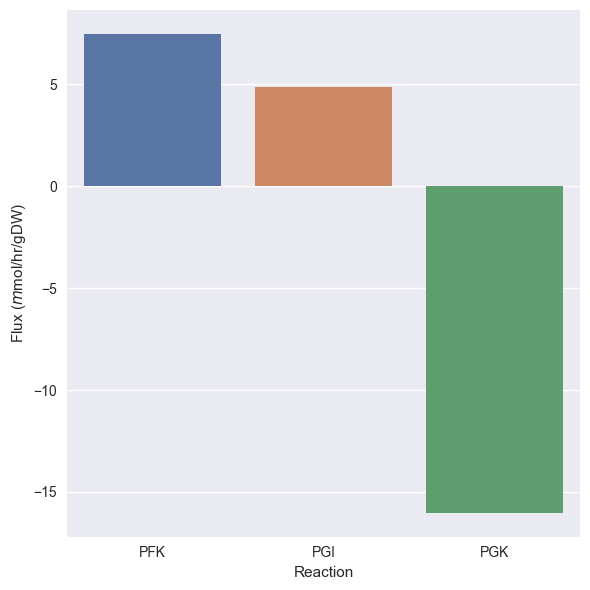

In [12]:
pFBA_result.plot(rxn_ids=["PFK", "PGI", "PGK"], aspect=1)

In [13]:
# perform flux sampling

sampling_result = pg_mod.do_flux_analysis(method="sampling", n=30)

Read LP format model from file C:\Users\qwert\AppData\Local\Temp\tmpulgyhdc7.lp
Reading time = 0.00 seconds
: 73 rows, 190 columns, 722 nonzeros


In [16]:
sampling_result.flux_df

,PFK,PFL,PGI,PGK,PGL,ACALD,AKGt2r,PGM,PIt2r,ALCD2x,...,MALS,MALt2_2,MDH,ME1,ME2,NADH16,NADTRHD,NH4t,O2t,PDH
0,8.136455,2.012919,7.306230,-15.589323,1.481313,-0.030135,-0.200670,-14.596565,2.441216,-0.030048,...,0.169376,0.0,3.109480,0.135734,2.319586,33.497332,3.471805,3.653353,19.446378,7.417451
1,8.954002,0.240421,8.366933,-17.139615,1.158407,-0.709859,-0.104804,-16.124940,2.495111,-0.669748,...,0.089351,0.0,2.147939,0.824229,2.153128,34.876927,1.498010,3.771994,19.956436,10.998865
2,10.096441,1.250305,2.093831,-15.423786,7.625897,-1.420546,-0.194995,-14.443195,2.411297,-0.901694,...,0.595585,0.0,2.347636,0.477438,2.466342,42.375032,15.547232,3.600201,23.535431,9.260710
3,12.278966,0.235281,3.851723,-16.069436,5.908252,-1.404621,-0.067023,-15.083927,2.423389,-1.049668,...,0.209606,0.0,1.465244,0.540197,2.646111,39.958497,8.282598,3.658258,22.200222,9.811926
4,11.080502,0.382634,1.570119,-15.294609,8.178705,-0.749271,-0.088928,-14.311955,2.416368,-0.600418,...,0.048774,0.0,-1.544365,2.018775,3.254201,41.687133,12.908287,3.715260,22.683485,9.044146
5,10.019731,0.672508,7.212477,-16.935753,2.400832,-0.577644,-0.121697,-15.943929,2.438920,-0.400386,...,0.614702,0.0,2.129748,1.471419,3.024100,39.080042,2.129578,3.727398,22.545303,10.239605
6,9.177922,0.102155,4.994711,-16.178629,4.613388,-0.648812,-0.112531,-15.180693,2.453948,-0.420103,...,0.556610,0.0,2.220185,1.837915,1.919416,40.870235,5.624063,3.694209,23.145570,10.082072
7,9.440105,1.299468,5.966434,-16.573700,3.682486,-0.514376,-0.113538,-15.577845,2.448832,-0.432155,...,1.301527,0.0,2.572240,1.498822,3.187130,41.211082,11.525291,3.988394,23.583873,10.676144
8,11.580519,0.596962,5.004591,-16.488093,4.782244,-0.657669,-0.025846,-15.495664,2.440406,-0.182540,...,1.162209,0.0,2.517418,0.959341,3.849965,44.579464,10.242524,3.903854,25.371990,11.093913
9,10.497716,0.094072,3.729291,-15.911775,5.959669,-0.458000,-0.004626,-14.927270,2.420921,-0.379534,...,1.138196,0.0,3.617052,0.235262,2.491668,43.527412,9.159283,3.904477,24.366599,10.909853


## Create Group object

In [17]:
from pipeGEM.utils import random_perturb

In [18]:
# create different models
models = [random_perturb(ecoli, 
                         in_place=False, 
                         structure_ratio=0.8,
                         constr_ratio=0.8, 
                         random_state=i) for i in range(9)]

Read LP format model from file C:\Users\qwert\AppData\Local\Temp\tmpc1033azf.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\qwert\AppData\Local\Temp\tmp3ahmn46r.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\qwert\AppData\Local\Temp\tmpgzsmgof8.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\qwert\AppData\Local\Temp\tmpgaz934us.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\qwert\AppData\Local\Temp\tmpweuxq9_q.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\qwert\AppData\Local\Temp\tmpcdcu6f4_.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros
Read LP format model from file C:\Users\qwert\AppData\Local\Temp\tmpysqt70xh.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns

In [19]:
# The first way to initialize Group is to use a dict of cobra.model dicts (str as keys)

grp = pg.Group({"G1": {f"m{i+1}": models[i] for i in range(3)},
               "G2": {f"m{i+1}": models[i] for i in range(3, 6)},
               "G3": {f"m{i+1}": models[i] for i in range(6, 9)}}, name_tag="group")

In [20]:
# browse the group table

grp.get_info(features=["group_name", "n_rxns", "n_mets", "n_genes"])

,group_name,n_rxns,n_mets,n_genes
m1,G1,71,72,95
m2,G1,69,72,94
m3,G1,65,67,83
m4,G2,63,69,85
m5,G2,76,72,122
m6,G2,74,72,112
m7,G3,69,69,107
m8,G3,71,70,94
m9,G3,66,70,92


In [21]:
# The second way to initialize Group is to use a dict of pipeGEM.Model lists

grp = pg.Group({"G1": [pg.Model(f"m{i+1}", models[i]) for i in range(3)],
               "G2": [pg.Model(f"m{i+1}", models[i]) for i in range(3, 6)],
               "G3": [pg.Model(f"m{i+1}", models[i]) for i in range(6, 9)]}, name_tag="group")

In [22]:
# This should return the same result with the first case

grp.get_info(features=["group_name", "n_rxns", "n_mets", "n_genes"])

,group_name,n_rxns,n_mets,n_genes
m1,G1,71,72,95
m2,G1,69,72,94
m3,G1,65,67,83
m4,G2,63,69,85
m5,G2,76,72,122
m6,G2,74,72,112
m7,G3,69,69,107
m8,G3,71,70,94
m9,G3,66,70,92


## Group operations

In [23]:
# indexing

grp["m1"]

Name,e_coli_core
Memory address,286c2ef5b10
Number of metabolites,72
Number of reactions,71
Number of genes,95
Number of groups,0
Objective expression,1.0*BIOMASS_Ecoli_core_w_GAM - 1.0*BIOMASS_Ecoli_core_w_GAM_reverse_712e5
Compartments,"extracellular space, cytosol"


In [24]:
# select multiple models

grp[["m1", "m2", "m4"]].get_info()

,group_name,n_rxns,n_mets,n_genes
m1,G1,71,72,95
m2,G1,69,72,94
m4,G2,63,69,85


In [25]:
# aggregate models with thier group name into a dict

grp_dic = grp.aggregate_models("group_name")
grp_dic

create a new group containing {'m1': pipeGEM.Model [m1] (g,m,r)=(95, 72, 71)
, 'm2': pipeGEM.Model [m2] (g,m,r)=(94, 72, 69)
, 'm3': pipeGEM.Model [m3] (g,m,r)=(83, 67, 65)
}
create a new group containing {'m4': pipeGEM.Model [m4] (g,m,r)=(85, 69, 63)
, 'm5': pipeGEM.Model [m5] (g,m,r)=(122, 72, 76)
, 'm6': pipeGEM.Model [m6] (g,m,r)=(112, 72, 74)
}
create a new group containing {'m7': pipeGEM.Model [m7] (g,m,r)=(107, 69, 69)
, 'm8': pipeGEM.Model [m8] (g,m,r)=(94, 70, 71)
, 'm9': pipeGEM.Model [m9] (g,m,r)=(92, 70, 66)
}


{'G1': Group [G1] containing 3 models,
 'G2': Group [G2] containing 3 models,
 'G3': Group [G3] containing 3 models}

In [26]:
grp_dic["G2"].get_info()

,group_name,n_rxns,n_mets,n_genes
m4,G2,63,69,85
m5,G2,76,72,122
m6,G2,74,72,112


In [27]:
# The models inside the pg.Group are pg.Models

isinstance(grp_dic["G2"]["m4"], pg.Model)

True

In [28]:
grp = pg.Group([pg_mod, pg_mod.copy()], )
pfba_result = grp.do_flux_analysis(method="pFBA")

Read LP format model from file C:\Users\qwert\AppData\Local\Temp\tmphgv0f41t.lp
Reading time = 0.01 seconds
: 72 rows, 190 columns, 720 nonzeros


In [29]:
pfba_result

FBA_Analysis at 0x286c77fca90

-----------
Parameters:
{'categorical': {'model'}, 'name': 'Unnamed_group', 'group_by': 'model', 'group': {'model': ['ecoli', 'copied_ecoli']}}
-----------
Result keys:
group_annotation, rxn_annotation, flux_df

In [30]:
pfba_result.log

{'categorical': {'model'},
 'name': 'Unnamed_group',
 'group_by': 'model',
 'group': {'model': ['ecoli', 'copied_ecoli']}}

C:\Users\qwert\miniconda3\envs\py310\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


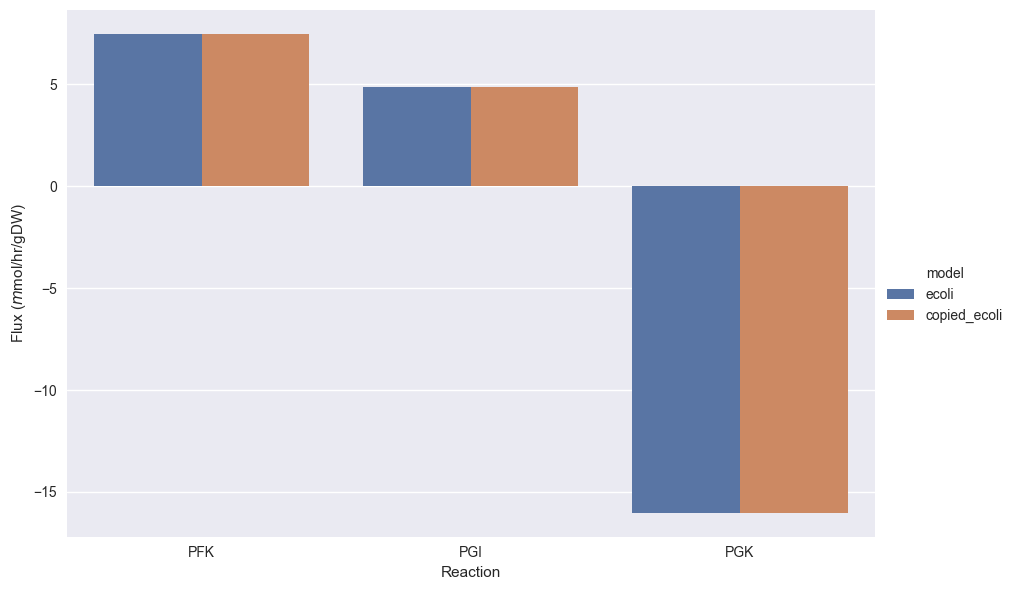

In [31]:
pfba_result.plot(rxn_ids=["PFK", "PGI", "PGK"], 
                 group_by="model", aspect=1.5, kind="bar")

## Comparisons

In [32]:
# compare model components
grp = pg.Group({"G1": [pg.Model(f"m{i+1}", models[i]) for i in range(3)],
               "G2": [pg.Model(f"m{i+1}", models[i]) for i in range(3, 6)],
               "G3": [pg.Model(f"m{i+1}", models[i]) for i in range(6, 9)]}, name_tag="group")
comparison = grp.compare(method="jaccard")

create a new group containing {'m1': pipeGEM.Model [m1] (g,m,r)=(95, 72, 71)
, 'm2': pipeGEM.Model [m2] (g,m,r)=(94, 72, 69)
, 'm3': pipeGEM.Model [m3] (g,m,r)=(83, 67, 65)
}
create a new group containing {'m4': pipeGEM.Model [m4] (g,m,r)=(85, 69, 63)
, 'm5': pipeGEM.Model [m5] (g,m,r)=(122, 72, 76)
, 'm6': pipeGEM.Model [m6] (g,m,r)=(112, 72, 74)
}
create a new group containing {'m7': pipeGEM.Model [m7] (g,m,r)=(107, 69, 69)
, 'm8': pipeGEM.Model [m8] (g,m,r)=(94, 70, 71)
, 'm9': pipeGEM.Model [m9] (g,m,r)=(92, 70, 66)
}


In [39]:
comparison.group_annotation

,group_name,0
0,G1,"[m1, m2, m3]"
1,G2,"[m4, m5, m6]"
2,G3,"[m7, m8, m9]"


                                          group_name
0  (0.2980392156862745, 0.4470588235294118, 0.690...
1  (0.8666666666666667, 0.5176470588235295, 0.321...
2  (0.3333333333333333, 0.6588235294117647, 0.407...


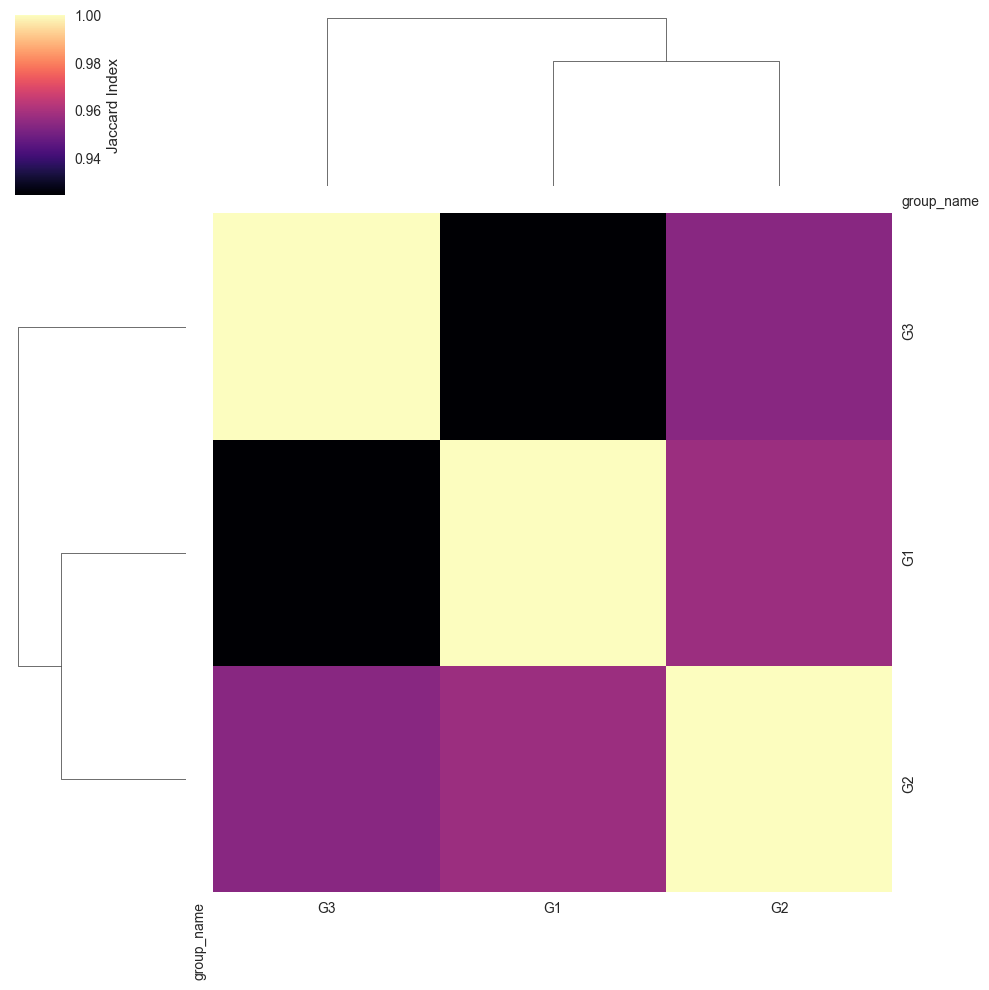

In [41]:
# visualization

comparison.plot(row_color_by="group_name", col_color_by="group_name")

In [ ]:
# data frame showing the jaccard values
comparison

In [42]:
comparison = grp.compare(method="jaccard", group_by=None)

In [44]:
comparison.group_annotation

,n_rxns,n_genes,n_mets,group_name
m1,71,95,72,G1
m2,69,94,72,G1
m3,65,83,67,G1
m4,63,85,69,G2
m5,76,122,72,G2
m6,74,112,72,G2
m7,69,107,69,G3
m8,71,94,70,G3
m9,66,92,70,G3


                                           group_name
m1  (0.2980392156862745, 0.4470588235294118, 0.690...
m2  (0.2980392156862745, 0.4470588235294118, 0.690...
m3  (0.2980392156862745, 0.4470588235294118, 0.690...
m4  (0.8666666666666667, 0.5176470588235295, 0.321...
m5  (0.8666666666666667, 0.5176470588235295, 0.321...
m6  (0.8666666666666667, 0.5176470588235295, 0.321...
m7  (0.3333333333333333, 0.6588235294117647, 0.407...
m8  (0.3333333333333333, 0.6588235294117647, 0.407...
m9  (0.3333333333333333, 0.6588235294117647, 0.407...


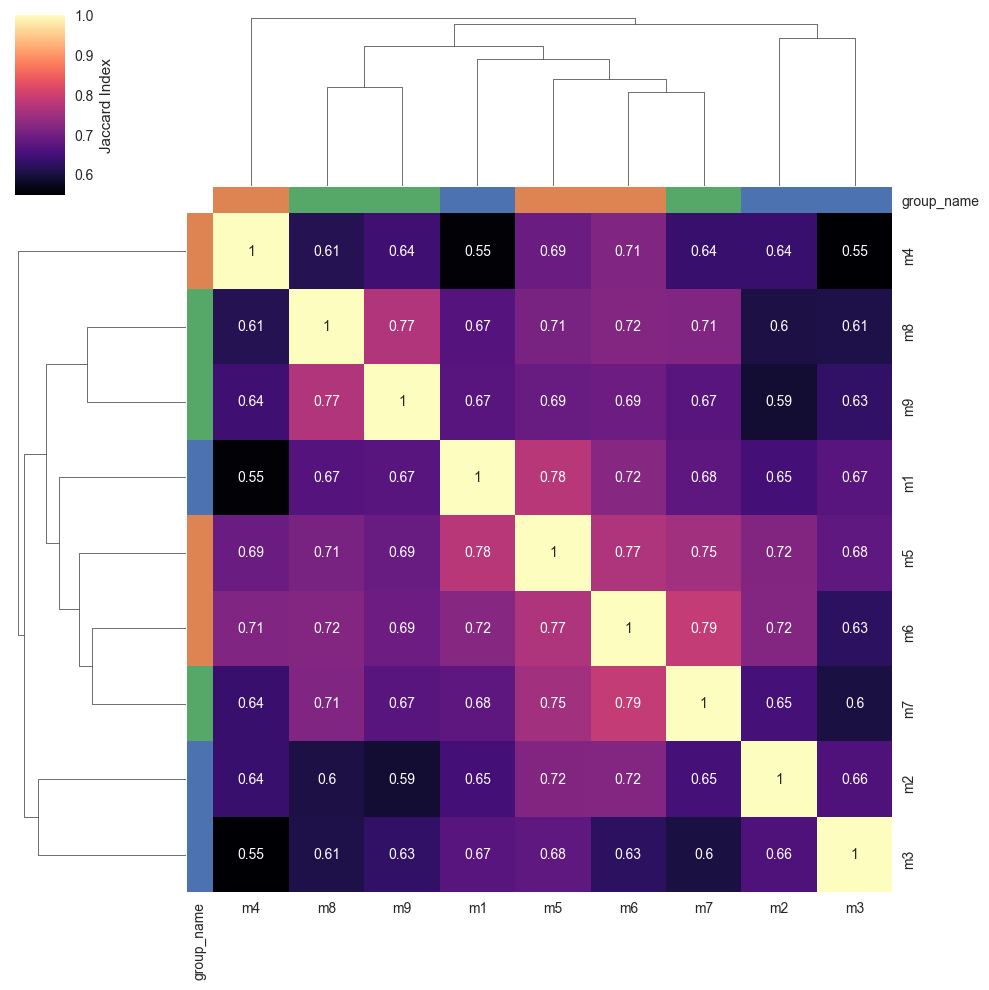

In [45]:
comparison.plot(annot=True, row_color_by="group_name", col_color_by="group_name")

In [46]:
comparison = grp.compare(method="PCA", group_by=None, n_components=3)

saving  PCA.png


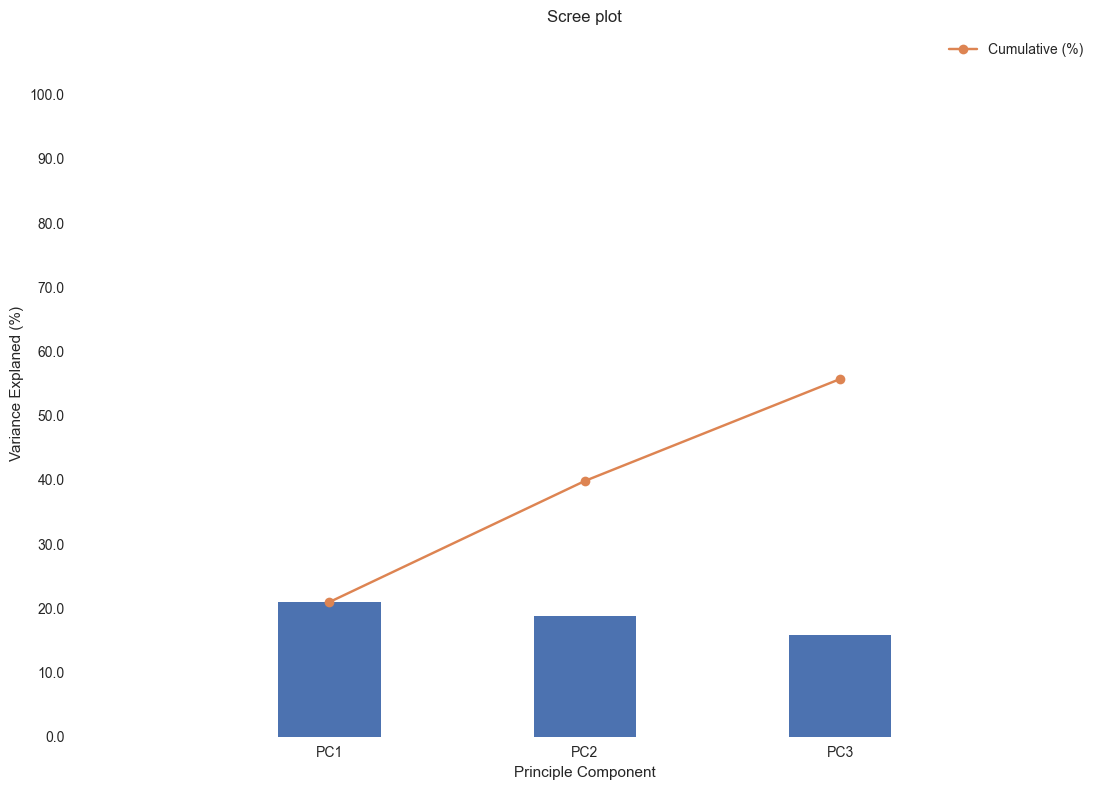

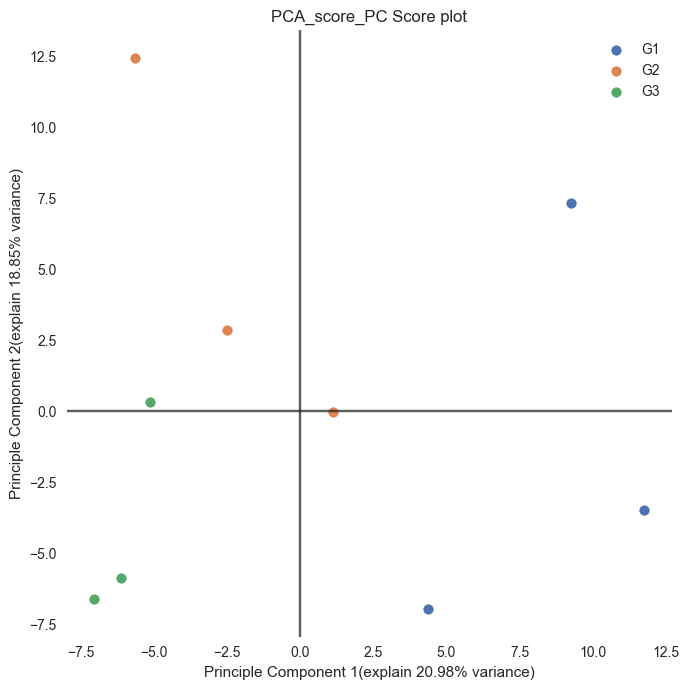

In [47]:
comparison.plot(file_name="PCA.png", prefix="")

In [48]:
comparison = grp.compare(group_by="group_name", method="num")

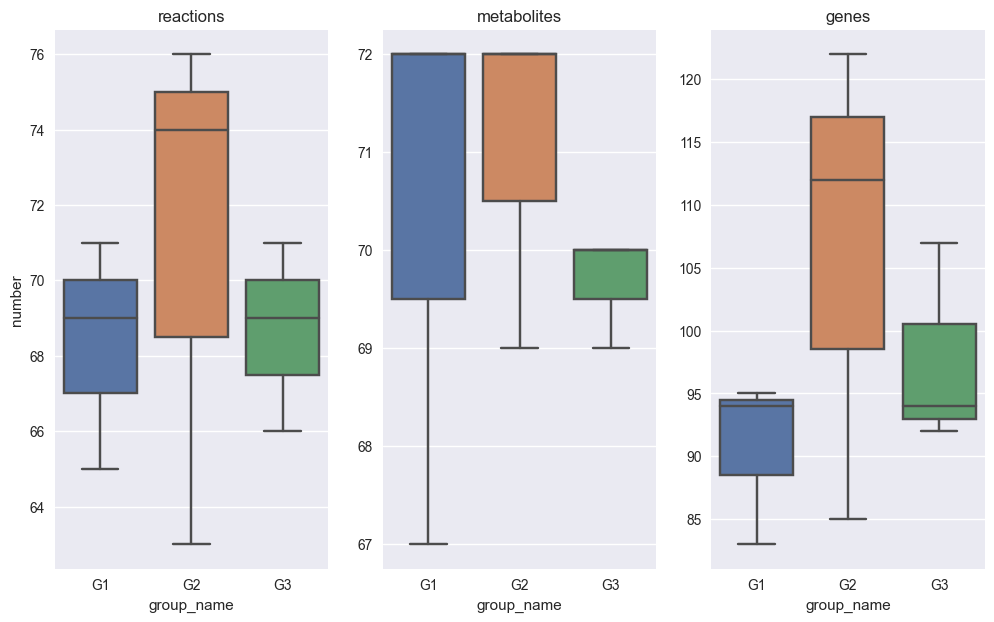

In [49]:
comparison.plot(name_order="default")